In [24]:
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from scipy import vectorize as vec
import numpy as np
import os

In [25]:
if 'Assignment' in os.getcwd():
    os.system('cd /media/darkwake/VIB2/EE3900/')

### e8.21

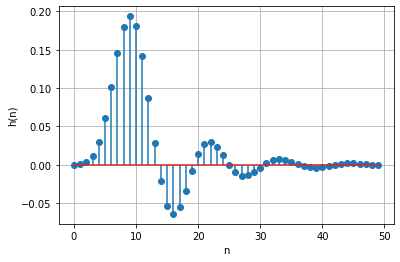

In [26]:
# read .wav file
input_signal, fs = sf.read('Sound_Noise.wav')

# sampling frequency of Input signal
sampl_freq = fs

# order of the filter
order = 7

# cutoff frquency 4kHz
cutoff_freq = 4000.0

# digital frequency
Wn = 2 * cutoff_freq / sampl_freq

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order, Wn, 'low')

# get partial fraction expansion
r, p, k = signal.residuez(b, a)

# number of terms of the impulse response
sz = 50
sz_lin = np.arange(sz)


def rp(x):
    return r @ (p ** x).T


rp_vec = vec(rp, otypes=['double'])

h1 = rp_vec(sz_lin)
k_add = np.pad(k, (0, sz - len(k)), 'constant', constant_values=(0, 0))
h = h1 + k_add
plt.stem(sz_lin, h)
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid()
plt.savefig('filter/figs/e8.21.png')
plt.show()

### e8.22

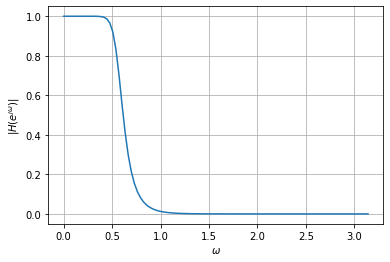

In [27]:
# DTFT
def H(z):
    num = np.polyval(b, z ** (-1))
    den = np.polyval(a, z ** (-1))
    H = num / den
    return H


# Input and Output
omega = np.linspace(0, np.pi, 100)

# subplots
plt.plot(omega, abs(H(np.exp(1j * omega))))
plt.xlabel('$\omega$')
plt.ylabel('$|H(e^{\jmath\omega})| $')
plt.grid()  # minor

# if using termux
plt.savefig('filter/figs/e8.22.png')
plt.show()

### e8.23

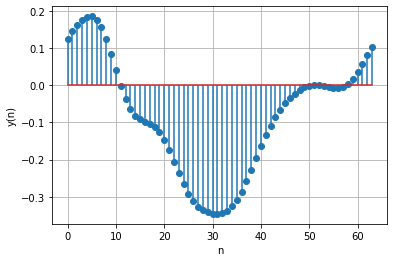

In [28]:
output_signal = signal.filtfilt(b, a, input_signal)

# get partial fraction expansion
r, p, k = signal.residuez(b, a)
#number of terms of the impulse response
sz = 64
sz_lin = np.arange(sz)

dftmtx = np.fft.fft(np.eye(sz))
invmtx = np.linalg.inv(dftmtx)
def rp(x):
    return r@(p**x).T

rp_vec = vec(rp, otypes=['double'])

h1 = rp_vec(sz_lin)
k_add = np.pad(k, (0, sz - len(k)), 'constant', constant_values=(0,0))
h = h1 + k_add
H = h@dftmtx
X = input_signal[:sz]@dftmtx
Y = H*X
y = (Y@invmtx).real
plt.stem(np.arange(sz), y[:sz])
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid()
plt.savefig('filter/figs/e8.23.png')
plt.show()